# "your_off-facebook_activity" Report - Instructions
### EMAT 22110 - Data in Emerging Media and Technology
### Author: David E. Silva
### Created: 7/21/20
### Last Updated: 2/24/21
<img src="https://media.giphy.com/media/3ohc14lCEdXHSpnnSU/giphy.gif">

#### Purpose
**The analysis step of the loop covers a wide variety of techniques to bring sense to data. This is an investigative and reflective process, not a canned sequence of actions. The most common error is matching the wrong analysis to the data in hand. In this assignment you will showcase your ability to conduct a variety of analyses and appropriately apply the analysis tools covered in class. You will submit a final report documenting your analysis so it can be reproduced by others and displaying evidence to support the conclusions you draw from the data.**

Before attempting this assignment, you will need to complete the Reporting Assignment, downoad your personal Facebook data, and review the content from "Focus on Analysis."

To complete this assignment follow the in-class example to:
1. Open and <a href="https://docs.python.org/3/library/json.html">load</a> the <a href="https://www.json.org/json-en.html">JSON</a> file titled "your_off-facebook_activity.json"
2. Convert the data in "your_off-facebook_activity.json" to a DataFrame object using Pandas
3. Complete steps 1 through 4 from “<a href="https://psyarxiv.com/r8g7c/">The Eight Steps of Data Analysis</a>” by Dustin Fife.
4. Select the conduct the appropriate statistical summaries and analyses (for example from scipy.stats: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html#scipy.stats.describe"> describe()</a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare">chisquare()</a>, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">ttest_ind()</a> or <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway">f_oneway()</a>) for the data type.
5. Choose an appropriate visualization to aid in interpreting the chosen summaries and analyses.

Then write a complete report of the data that:

6. Provides and overview that clearly states the driving question and links the question to the data approach
7. Describe the raw data structure and data types used in the analysis
8. Documents the wrangling and analysis of the data
9. Includes a clear and appropriate visualization
10. Draws a data-driven conclusion that addresses the original question
11. Reflects on limitations, alternative approaches, and next steps

## Some Direction
### 1. Overview
Your driving question should be something along these lines:
How is your Facebook information connected to non-Facebook apps? How frequently do these apps request your Facebook data? Do all apps request Facebook data with the same frequency? Why do apps connect to Facebook data?
An example of a hypothesis could be:
Because Facebook data is used to target advertisements, the apps with the most ads will access Facebook data the most frequently.

In [45]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

To read in your data, you will need the json file titled "your_off_facebook_activity". This file is usually located the the folder titled "ads_and_businesses" from the Facebook download.

In [46]:
with open(r"D:\EMAT_22110\FB Data Silva\facebook-davidsilva100046_toshare\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

### 2. The Data
Describe the raw data structure and data types. Where did this data come from? Do you trust this data? Are there any concerns using this data?

Your very first step should be to explore the data structure. As we saw with the Instagram data, this may look different for some people. My data is structured as a hierarchy of lists and dictionaries. Specifically, the act dictionary contains the key "off_facebook_activity" whose value is a list of other dictionaries. Each dictionary in that list is the data for one specific app. 

In [47]:
type(act['off_facebook_activity'])

list

In [48]:
act['off_facebook_activity'][0]

{'name': 'U.S. Bank - Inspired by customers',
 'events': [{'id': 1591992844216198,
   'type': 'ACTIVATE_APP',
   'timestamp': 1594274368},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594239280},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594156238},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594066670},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593919348},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593652182},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593651360},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593273365},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593127728},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593100373},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593095964},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1592933608},
  {'id': 15919

In [49]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

As shown above, each dictionary for each app includes the key "events" whose value is a list of events each stored as a yet another dictionary. The information for each event includes an identifying number, the kind of event logged, and the time each event occurred.

In [50]:
act['off_facebook_activity'][0]['events'][0]['type']

'ACTIVATE_APP'

### 3. Data Preparation
With the structure of the data file in mine, you will need to decide what information you are most interested in to answer the driving questions or test your hypothesis. You should describe each step taken to wrangle, summarize, or modify your data. The one exception is if you removed data due to privacy concerns or any other reason. You do not need to describe what was removed for the assignment.

You may use the code below as a starting point to summarize the activity data. The two approaches shown below both select and summarize the number of events of specific types for each app. The first uses list comprehension, which we have talked about a few times in class, but is admittedly a bit more complex than the previous examples.
The second approaches uses a for loop to append the desired data to new lists.

##### List Comprehension
`apps_requests` is the resulting list of looping over each dictionary in the 'off_facebook_activity' list and selecting the value from the 'name' key.
`all_event_count` is the resulting list of looping over each dictionary in the 'off_facebook_activity' list and getting the length of the 'events' list.
The other six variables accomplish the follow task, except for different activity types:
Each dictionary in the 'off_facebook_activity' list is selected in order and given the temporary name `j`. Each element from the 'events' key is selected from j and it's 'type' is checked against a specific type. The number of True values for that type are then saved for all the apps. 

In [51]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

True

In [52]:
apps_requests = [x['name'] for x in act['off_facebook_activity']]
all_event_count = [len(x['events']) for x in act['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in act['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in act['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in act['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in act['off_facebook_activity']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in act['off_facebook_activity']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in act['off_facebook_activity']]

##### For Loop Method
This alternative method results in the exact same data as the list comprehension. However, instead of nesting two list comprehensions, the variable `i` is used to iterate over the list of app dictionaries. For each iteration of the loop, a simpler list comprehension statement is applied and the result is appended to the end of the empty lists declared in the first few lines. 

In [53]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

No matter what method you use, the end result is a series of lists containing the data of interest. These can then be combined into a DataFrame. Below, I'm using a new method. The first line creates an empty DataFrame with the desired column names. The rest of the lines then assign the lists of data to those columns.

In [54]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,0
1,"Egg, Inc.",165,109,0,0,0,35,0
2,AP News,465,133,325,0,0,7,0
3,TikTok - Make Your Day,371,99,267,5,0,0,0
4,uoregon.edu,1,0,0,0,0,0,1


### 4. Data Visualization
You must include at least one appropriate visualization of the data. Your visualization cannot be an exact replication of the example below.

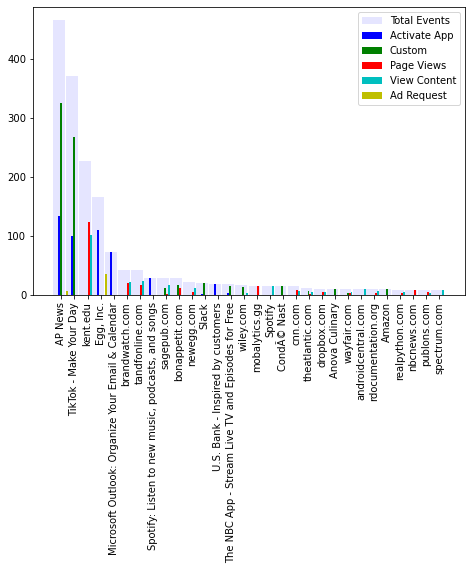

In [55]:


appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'b', alpha = .1, width = .90)
ax.bar(X + 0.00, appbyevent['Activate App'][0:30], color='b', width = .15)
ax.bar(X + 0.15, appbyevent['Custom'][0:30], color='g', width = .15)
ax.bar(X + 0.30, appbyevent['Page Views'][0:30], color='r', width = .15)
ax.bar(X + 0.45, appbyevent['View Content'][0:30], color='c', width = .15)
ax.bar(X+.60, appbyevent['Ad Request'][0:30], color = 'y', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events' ,'Activate App', 'Custom', 'Page Views', 'View Content', 'Ad Request'])
plt.show()

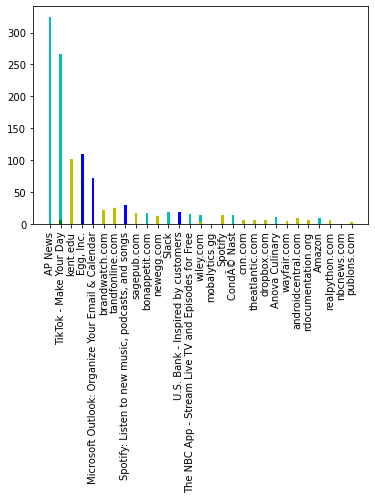

In [56]:
X = np.arange(30)
plt.bar(appbyevent['App'][0:29], appbyevent['Activate App'][0:29], color='b', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['Custom'][0:29], color='c', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['Search'][0:29], color='g', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['View Content'][0:29], color='y', width = .25)
plt.xticks(rotation=90)
plt.show()

At this point, you should be thinking about what statistical tests are relevant for your chosen data. Make sure to match the right test to your question/hypothesis and fully explain the results.

### 5. Conclusions
Draw at least two data-driven conclusions from the above analysis and visualization. What did you learn? Were there answers to your driving questions?

### 6. Limitations, Alternative Approaches, & Next Steps
Note any limitations to to this analysis or other ways to looking at the same data. Are there new questions raised from this analysis? What could be done next to continue adding new understanding to this topic?